# Relationship between continental-scale patterns of fire activity and modes of climate variability 

Geocomputation and maschin learning 

by *Tatiana Klisho*, 
Swedish University of Agricultural Sciences (SLU, Alnarp)

## Project discription

Changes in sea level pressure (SLP) and sea surface temperatures (SSTs) cause long-term meteorological disturbances, that impact moisture/drought balance and thus favor the occurrence of major fire outbreaks.

A better understanding of the relationship between continental-scale patterns of fire activity and modes of climate variability may explain how inter-annual to multidecadal variability in SLP and SST drives fire at the continental scale.

Previous correlation analysis revealed strong linkages between climate variability and regional fire activity. Based on that, domains of potential predicability were obtained (see Figure 1). What is interesting to notice is that geographical locations where the main patterns were observed correspond to main climate oscillations, such as ENSO and NAO. This is in line with previous studies. This observation prompted me to the further investigation of correlation between aforementioned oscilations, as well as other climate phenomenon (AMO, SNAO) and fire activity, since some of them might have much more of an impact on fire prone conditions over Europe.

For the further analysis following GeoComputation technics were used:
- Data computation, by using bash scripting and Climate Data Operators (CDO) - Section 2,
- Principal component analysis (PCA) - Section 3,
- Experementing with different interpolation technics - Section 3,
- Correlation Analysis - Section 4.

## Section 1. Data

Tis study focuses on the continental Europe, and includes European part of Russia. The geographical domain is 35$^{\circ}$N-75$^{\circ}$N and 20$^{\circ}$W-50$^{\circ}$E. The covered period is from 1980 to
2016 year. 

To assess the influence of ocean/climate variability on fire prone conditions, we employed a series of different data sets:
- The fire data are coming from The European Forest Fire Information System (EFFIS). Data are presented as country-wised annual area burned. This database includes: Portugal, Spain, France, Italy, Greece, Finland, Belarus, Latvia, Estonia, Lithuania, St.Petersburg, Norway, both northern and southern parts of Sweden, Germany, Cz.Republic,	Ukraine, Hungary, Turkey, Slovakia, Slovenia, Romania, Bulgaria, Croatia and Poland. 
- The predictors of area burned such as SST and SLP are retrieved from the European Centre for Medium-Range Weather Forecasts (ECMWF). ECMWF provides monthly gridded reanalysis data (ERA5), with global horizontal coverage and 0.25$^{\circ}$ x 0.25$^{\circ}$ horizontal resolution. 


/home/tatiana/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


Text(-180, 25, 'A')

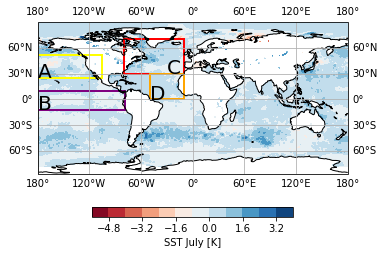

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np
import xarray as xr
import cartopy as cart

filename = ('/home/tatiana/Documents/DATA/SSTERA5/SSTda_7.nc')
sst = xr.open_dataset(filename).sst

ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True,dms=True,x_inline=False,y_inline=False)
image=ax.contourf(sst[1].longitude.values,sst[1].latitude.values,sst[1].values,10,transform=ccrs.PlateCarree(),cmap='RdBu')
cbar=plt.colorbar(image,orientation='horizontal',extend='both',shrink=0.60)
cbar.ax.set_xlabel('SST July [K]')

ax.add_patch(mpatches.Rectangle(xy=[-80,30],width=70,height=40,linewidth=2,edgecolor='r',facecolor='none'))
ax.add_patch(mpatches.Rectangle(xy=[-50,0],width=40,height=30,linewidth=2,edgecolor='orange',facecolor='none'))
ax.add_patch(mpatches.Rectangle(xy=[-180,-12],width=102,height=22,linewidth=2,edgecolor='purple',facecolor='none'))
ax.add_patch(mpatches.Rectangle(xy=[-190,25],width=85,height=27,linewidth=2,edgecolor='yellow',facecolor='none'))
#plt.title('Domains of potential predictability')
ax.text(-30,30,'C',c='BLACK',fontsize=20)
ax.text(-50,0,'D',c='BLACK',fontsize=20)
ax.text(-180,-12,'B',c='BLACK',fontsize=20)
ax.text(-180,25,'A',c='BLACK',fontsize=20)

*Figure 1: Domains of potential predictability.*

## Section 2. Climate indices

All the climate indices (see Figure 2) were obtained by using Climate Data Operators (CDO) software and bash scripting. 

### 2.1 ENSO 3.4

El Niño–Southern Oscillation (ENSO) - is an irregular periodic variation in SST and wind over the tropical eastern Pacific Ocean, which affects climate of much of the tropics and subtropics. 

The Niño 3.4 anomalies represent an average equatorial SSTs across the Pacific. The Niño 3.4 index is calculated for the region: (5N-5S, 170W-120W) and typically uses a 3-month running mean. El Niño or La  Niña events are defined when the  Niño 3.4 SSTs exceed +/- 0.4C for a period of six months or more.

In [ ]:
%%bash
#!/bin/bash

mkdir /home/tatiana/Documents/DATA/SSTERA5/ENSO/
output="/home/tatiana/Documents/DATA/SSTERA5/ENSO/"
dir="/home/tatiana/Documents/DATA/SSTERA5/"
cd $dir 

cdo -b F64 -fldmean -timselmean,12 -sellonlatbox,120,170,-5,5 -detrend download.nc ${output}ENSOm.nc
cdo sub ${output}ENSOm.nc -timmean ${output}ENSOm.nc ${output}ENSOa.nc
cdo runmean,3 ${output}ENSOa.nc ${output}ENSO.nc

### 2.2 NAO

North Atlantic Oscillation (NAO) - is the most prominent pattern of atmospheric variability in the Northern Hemisphere, especially during the cold season months (November through April). The NAO refers to a large-scale meridional oscillation of atmospheric mass between subtropical anticyclone near Azores and the subpolar low pressure system near Iceland.

The NAO was calculated from the sea level pressure difference between the Subtropical (Azores) High (37.82◦N, 25.75◦W) and the Subpolar Low (65.08◦N,22.73◦W) for the November-December-January-February-March (NDJFM) period.

The SLP values at each station were normalized by removing the long-term mean and by dividing by the long-term standard deviation. Normalization is used to avoid the series being dominated by the greater variability of the northern station. 

In [ ]:
%%bash
#!/bin/bash


mkdir /home/tatiana/Documents/DATA/SLPERA5/NAO/
output1="/home/tatiana/Documents/DATA/SLPERA5/NAO/"
dir1="/home/tatiana/Documents/DATA/SLPERA5/"
cd $dir1 


cdo -b F64  -timselmean,5 -select,season=NDJFM -remapnn,lon=37.82/lat=25.75 -detrend download.nc ${output1}NAOm1.nc
cdo -sub -fldmean ${output1}NAOm1.nc -timmean ${output1}NAOm1.nc ${output1}NAOha.nc
cdo -b F64 -div ${output1}NAOha.nc -timstd ${output1}NAOm1.nc ${output1}NAOhn.nc

cdo -b F64 -timselmean,5 -select,season=NDJFM -remapnn,lon=65.08/lat=22.73 -detrend download.nc ${output1}NAOm2.nc
cdo -sub -fldmean ${output1}NAOm2.nc -timmean ${output1}NAOm2.nc ${output1}NAOla.nc
cdo -b F64 -div ${output1}NAOla.nc -timstd ${output1}NAOm2.nc ${output1}NAOln.nc

cdo -sub ${output1}NAOhn.nc ${output1}NAOln.nc ${output1}NAO.nc


### 2.3 SNAO

Summer north atlantic oscillation (SNAO) - is the prominent atmospheric circulation patterns lookalike winter NAO, prevailing during the summer time, but a. with the action center located farther to the north (the southern node is over northwest Europe, rather than Azores region) b. with the smaller spatial extent and c. lesser amplitude than its winter counterpart. Based on the dicription, SNAO index was calculated by following the same procidure as for NAO index (see 2.2 NAO), but using summer months. 

In [ ]:
%%bash
#!/bin/bash


mkdir /home/tatiana/Documents/DATA/SLPERA5/SNAO/
output2="/home/tatiana/Documents/DATA/SLPERA5/SNAO/"



cdo -b F64 -timselmean,3 -select,season=JJA -remapnn,lon=37.82/lat=25.75 -detrend download.nc ${output2}SNAOm1.nc
cdo -sub -fldmean ${output2}SNAOm1.nc -timmean ${output2}SNAOm1.nc ${output2}SNAOha.nc
cdo -b F64 -div ${output2}SNAOha.nc -timstd ${output2}SNAOm1.nc ${output2}SNAOhn.nc

cdo -b F64 -timselmean,3 -select,season=JJA -remapnn,lon=65.08/lat=22.73 -detrend download.nc ${output2}SNAOm2.nc
cdo -sub -fldmean ${output2}SNAOm2.nc -timmean ${output2}SNAOm2.nc ${output2}SNAOla.nc
cdo -b F64 -div ${output2}SNAOla.nc -timstd ${output2}SNAOm2.nc ${output2}SNAOln.nc

cdo -sub ${output2}SNAOhn.nc ${output2}SNAOln.nc ${output2}SNAO.nc

### 2.4 AMO

The Atlantic Multidecadal Oscillation (AMO) - is the theorized variability of the SST of the North Atlantic Ocean on the timescale of several decades.

The AMO index was calculated by averaging summer months (JJA) Atlantic SSTs over the region 80◦W–0◦E and 0◦N–60◦N, followed by  subtracting the  global  average of JJA SSTs between 60◦S–60◦N and then applying 10 years low-pass filtering. 

In [ ]:
%%bash
#!/bin/bash


mkdir /home/tatiana/Documents/DATA/SSTERA5/AMO/
output3="/home/tatiana/Documents/DATA/SSTERA5/AMO/"
cd $dir

cdo -b F64 -fldmean -yearmonmean -select,season=JJA -sellonlatbox,-80,0,0,60 -detrend download.nc ${output3}AMOm1.nc
cdo -b F64 -sub ${output3}AMOm1.nc -timmean ${output3}AMOm1.nc ${output3}AMO1.nc

cdo -b F64 -fldmean -yearmonmean -select,season=JJA -sellonlatbox,-180,180,-60,60 -detrend download.nc ${output3}AMOm2.nc
cdo -b F64 sub ${output3}AMOm2.nc -timmean ${output3}AMOm2.nc ${output3}AMO2.nc


cdo sub ${output3}AMO1.nc ${output3}AMO2.nc ${output3}AMO_12.nc

cdo lowpass,10 ${output3}AMO_12.nc ${output3}AMO.nc 

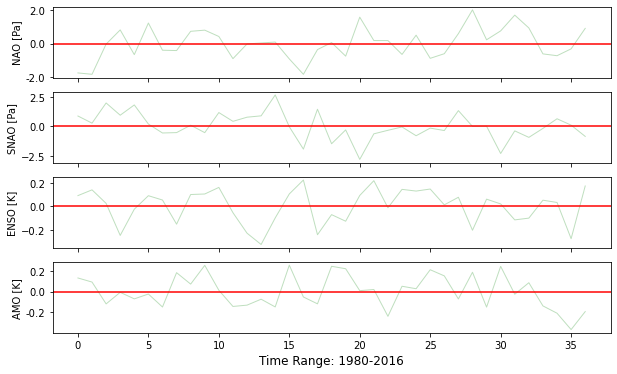

In [6]:
import matplotlib as mpl
%matplotlib inline

path='/home/tatiana/Documents/DATA/SLPERA5/NAO/'
path1='/home/tatiana/Documents/DATA/SLPERA5/SNAO/'
path2='/home/tatiana/Documents/DATA/SSTERA5/ENSO/'
path3='/home/tatiana/Documents/DATA/SSTERA5/AMO/'


data=xr.open_dataset(path+'NAO.nc')
data1=xr.open_dataset(path1+'SNAO.nc')
data2=xr.open_dataset(path2+'ENSOa.nc')
data3=xr.open_dataset(path3+'AMO.nc')


fig, ax = plt.subplots(4, sharex=True, figsize=(10,6))

ax[0].plot((data.msl.isel(lon=0,lat=0)),linewidth=1,alpha=0.25,c='green')
#ax[0].set_title('Climate Indices', size ='14')
ax[0].axhline(y=0, c='red')
ax[0].set_ylabel('NAO [Pa]', fontsize=10)
ax[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
#ax[0].yaxis.set_ticklabels([])

ax[1].plot((data1.msl.isel(lon=0,lat=0)),linewidth=1,alpha=0.25,c='green')
ax[1].set_ylabel('SNAO [Pa]', fontsize=10)
ax[1].axhline(y=0, c='red')



ax[2].plot((data2.sst.isel(lon=0,lat=0)),linewidth=1,alpha=0.25,c='green')
ax[2].set_ylabel('ENSO [K]',fontsize=10)
ax[2].axhline(y=0, c='red')



ax[3].plot((data3.sst.isel(lon=0,lat=0)),linewidth=1,alpha=0.25,c='green')
ax[3].set_ylabel('AMO [K]', fontsize=10)
ax[3].set_xlabel('Time Range: 1980-2016', fontsize=12)
ax[3].axhline(y=0, c='red')
ax[3].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))


*Figure 2: Climate Indices.*

## Section 3. PCA & different technics of interpolation. 

I decided to use PCA or empirical orthogonal function (EOF) analysis in order to reduce dimentionality of the fire dataset. PCA is a technique for increasing interpretability but at the same time minimizing information loss. The spatial patterns are the EOFs, and can be thought of as basis functions in terms of variance. The associated temporal projections are the pricipal components (PCs) and are the temporal coefficients of the EOF patterns.

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.decomposition import PCA
from netCDF4 import Dataset,num2date
import cartopy.crs as crs
import cartopy.feature as cfeature
from scipy.interpolate import griddata  


path = '/home/tatiana/Documents/DATA/RSLTS/Fires_detrend_a_test.csv' 
df = pd.read_csv(path,delimiter=';',skip_blank_lines=False)

path1 = '/home/tatiana/Documents/DATA/RSLTS/Coords.csv' 
df1 = pd.read_csv(path1,delimiter=',',skip_blank_lines=False)

df2=pd.melt(df,id_vars=['Years']).rename(columns={'variable':'Country'})
df3=pd.merge(df2,df1, how='left',on='Country')
df3.to_csv('/home/tatiana/Documents/DATA/df3.csv',sep=';', index=False)
df4=pd.pivot_table(df,columns='Years')

####__________EOFs_____####

pca = PCA(n_components=3)        #setting_the_number_of_PCs
newpca=pca.fit_transform(df4)
pca_1=pd.DataFrame(data = newpca, columns = ['PC_1', 'PC_2','PC_3'])
pca_DfC=pd.DataFrame(data = newpca, columns = ['PC_1', 'PC_2','PC_3'])    #creatig_the_dataframe_ with_PCs
pca_DfC.insert(0, "Country",['Belarus','Bulgaria','Croatia','Czech_Republic','Estonia','Finland','France', 'Germany','Greece','Hungary','Italy','Latvia','Lithuania','Norway', 'Petersburg','Poland', 'Portugal','Romania','Slovakia','Slovenia', 'Spain','Sweden','SwedenN','Turkey','Ukraine'], True) 
eof_f=pca_DfC.merge(df1,how='left',on='Country')

####__________PCs_____####

df_y=df.drop('Years',axis=1)
pca_y = PCA(n_components=3)                
newpca_y=pca.fit_transform(df_y)
pca_2=pd.DataFrame(data = newpca_y, columns = ['PC_1', 'PC_2','PC_3'])  



Three different methods of interpolation have been tested with the aim of finding the best way of displaying data. The methods are:
- $Cubic$ - return the value determined from a cubic spline,
- $Linear$ - tessellate the input point set to N-D simplices, and interpolate linearly on each simplex, and
- $Nearest$ - return the value at the data point closest to the point of interpolation. 


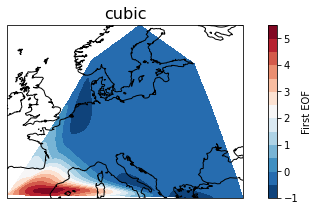

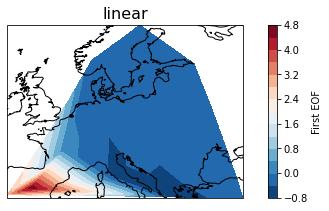

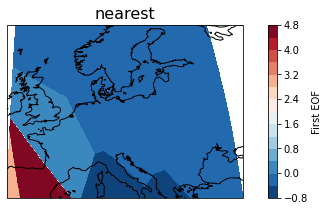

In [7]:
m=['cubic','linear','nearest']
for i in m:

    fig = plt.figure(figsize=(9,7))
    ax=plt.subplot(211,projection=crs.Robinson())
    ax.add_feature(cfeature.COASTLINE)
    x=eof_f.Longitude.values
    y=eof_f.Latitude.values
    z=eof_f.PC_1.values/100000

    xi =np.arange(np.min(x),np.max(x),0.1)
    yi = np.arange(np.min(y),np.max(y),0.1)
    xi, yi = np.meshgrid(xi,yi)
    zi = griddata((x,y),z,(xi,yi),method='{}'.format(i))  

    plt.contourf(xi,yi,zi,transform=crs.PlateCarree(),levels=14, cmap="RdBu_r")
    bar = plt.colorbar(label='First EOF')#,format='%.1f' )
    plt.title('{}'.format(i), fontsize=16)

*Figure 3: Visualisation of the first EOF of fire activity by using different interpolation technics (cubic, linear and nearest).*

Cubic method turned out to be the most succesful in terms of displaying data (see Figure 3). Thus, it was chosen for the visualisation of the following PCA (see Figure 4).

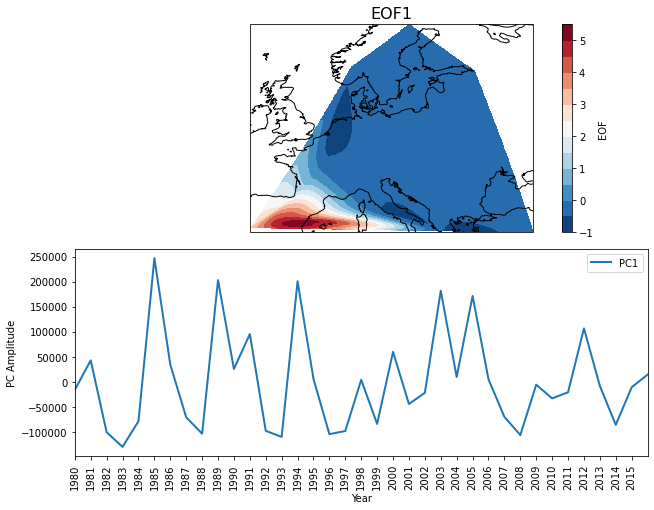

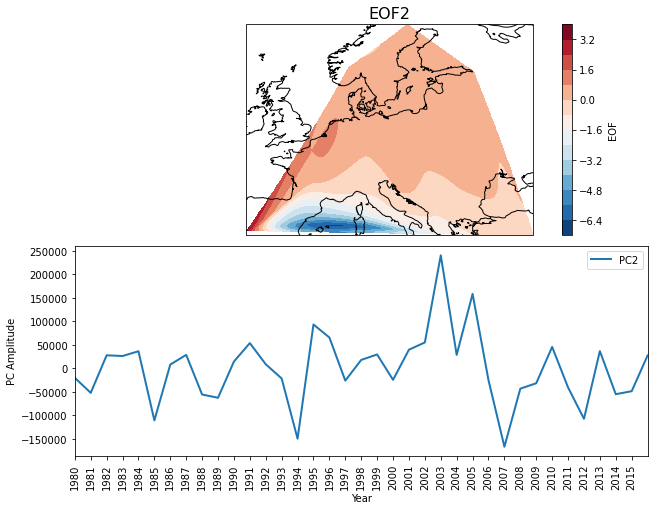

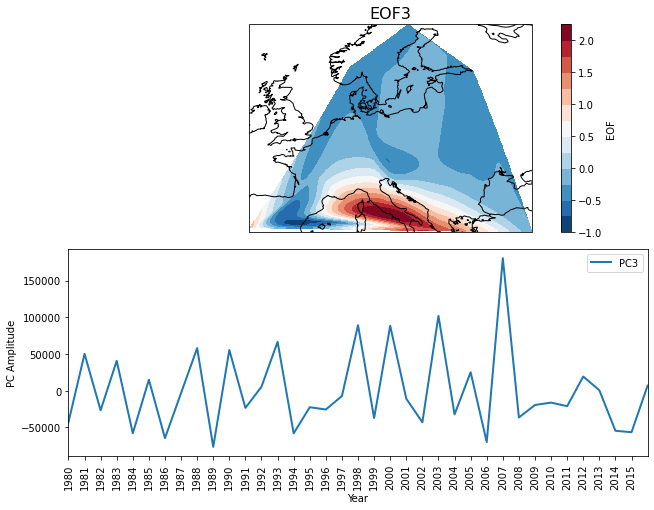

In [17]:
startY = 1980
endY   = 2016
m=['PC_1','PC_2','PC_3']

for i in range(0,3):
    fig = plt.figure(figsize=(9,7))
    ax=plt.subplot(211,projection=crs.Robinson())
    ax.add_feature(cfeature.COASTLINE)
    x=eof_f.Longitude.values
    y=eof_f.Latitude.values
    z=pca_1.iloc[:,i].values/100000

    xi =np.arange(np.min(x),np.max(x),0.1)
    yi = np.arange(np.min(y),np.max(y),0.1)
    xi, yi = np.meshgrid(xi,yi)
    zi = griddata((x,y),z,(xi,yi),method='cubic')  

    plt.contourf(xi,yi,zi,transform=crs.PlateCarree(),levels=14, cmap="RdBu_r")
    bar = plt.colorbar(label='EOF')#,format='%.1f' )
    plt.title('EOF'+ str(i+1), fontsize=16)

    plt.subplot(212)
    years = [startY+x for x in range(0, 37)]
    plt.plot(years,pca_2.iloc[:,i],linewidth=2,label='PC'+str(i+1))#, 'tab:purple',label='PC1')
    plt.legend()

    plt.xlim(startY, endY)
    plt.xticks(range(startY, endY),rotation='vertical')
    plt.tight_layout()
    plt.xlabel('Year')
    plt.ylabel('PC Amplitude')


*Figure 4: Loading of three leading PCs and EOFs of fire activity.*

### 3.1 Check variances explained by leading EOFs

(1.0, 15.0)

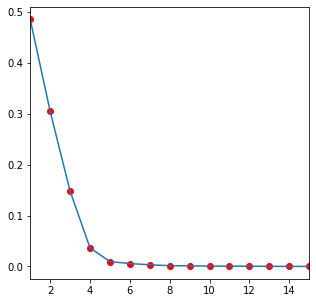

In [10]:
pca = PCA(n_components=15)        #setting_the_number_of_PCs
newpca_plot=pca.fit_transform(df4)

f, ax = plt.subplots(figsize=(5.,5.))
variance_fractions = pca.explained_variance_ratio_
eof_num = range(1, 16)
ax.plot(eof_num,variance_fractions.data, 'ro')
ax.plot(eof_num,variance_fractions.data)
ax.set_xlim(1, 15)
#plt.title('Fraction of the total variance represented by each EOF')
#print(sum(pca.explained_variance_ratio_[0:3]))

*Figure 5: Fraction of the total variance represented by each EOF.*

The first three EOFs capture aproximately 94% of total variance for fire activity.

## Section 4. Correlation analysis

Correlation analysis was performed to look for the statistical relationship between two independent variables, such as first three leading PCs of fire activity and climate indices (ENSO, AMO, NAO and SNAO).

In [49]:
def fun(x,y):
    x=np.squeeze(x) #remove_extra_dimentions
    c_matrix=np.corrcoef(x,y)   #correlation
    c=c_matrix[0,1]
    c=np.round(c,2)
    return c    
a=[]
D=[data.msl,data1.msl,data2.sst,data3.sst]
for i in range(0,3):
    for j in D:
        a.append(fun(j,pca_2.iloc[:,i]))


| | AMO  | ENSO    | NAO   | SNAO   |
|---:|:-------------|:-----------|:------|:------|
| PC1f | 0.14  | 0.36    |  0.06   | -0.09     |
| PC2f | 0.19  | 0.24    | -0.37   | -0.25     
| PC3f | 0.12  | 0.10    |  0.19   | -0.06     

*Table 1: Pearson correlation analysis. Values between 0 and 0.3 (0 and -0.3)) indicate a weak positive (negative) linear relationship, values between 0.3 and 0.7 (-0.3 and -0.7)) indicate a moderate positive (negative) linear relationship and values between 0.7 and 1.0 (-0.7 and -1.0)) indicate a strong positive (negative) linear relationship.*

Pearson Correlation Analysis (see Table 1) revealed moderate positive linear relationship betwen first PC of fire activity and ENSO, and moderate negative relationship between second PC of fire activity and NAO. This proves once again that big oceanic/climatic oscillations coincide with continental wild-fire activity.